In [174]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [175]:
# Read dataset
# df = pd.read_csv("Data/1_lebron_james_shot_chart_1_2023.csv")
# df = pd.read_csv("Data/2_james_harden_shot_chart_2023.csv")
df = pd.read_csv("Data/3_stephen_curry_shot_chart_2023.csv")

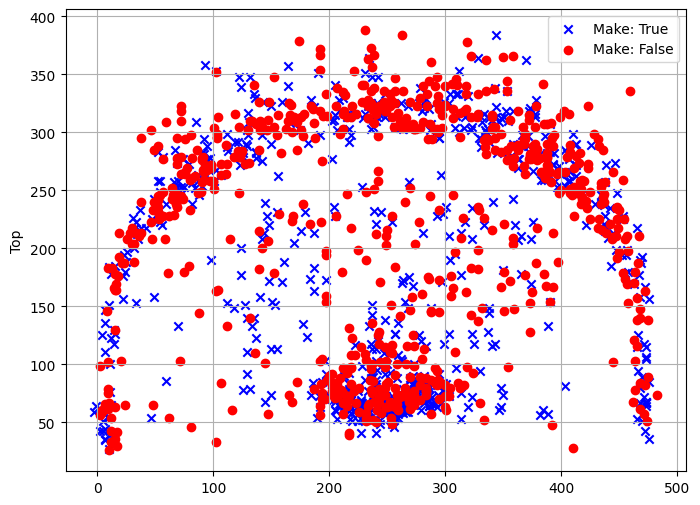

In [176]:
true_points = df[df["result"]] 
false_points = df[~df["result"]]

plt.figure(figsize=(8, 6)) 
plt.scatter(true_points["left"], true_points["top"], marker='x', color='blue', label='Make: True') 
plt.scatter(false_points["left"], false_points["top"], marker='o', color='red', label='Make: False') # Label axesplt.xlabel("Left") 
plt.ylabel("Top") # Add legend 
plt.legend() # Display the graph 
plt.title("") 
plt.grid(True) 
plt.show() 

In [177]:
print(f"Initial columns: {df.columns.tolist()}\n")

df['score_difference'] = df['lebron_team_score'] - df['opponent_team_score']
# Drop columns
columns_to_drop = [
    "season",
    "color",
    "opponent_team_score",
    "date",
    "qtr",
    "time_remaining",
    "lebron_team_score",
    "lead",
    "opponent",
    "team",
    "left",
    "top",
]
df.drop(columns_to_drop, axis=1, inplace=True)

# df = df[df["shot_type"] == 2]

print(f"Final head:\n{df.head()}")

Initial columns: ['top', 'left', 'date', 'qtr', 'time_remaining', 'result', 'shot_type', 'distance_ft', 'lead', 'lebron_team_score', 'opponent_team_score', 'opponent', 'team', 'season', 'color']

Final head:
   result  shot_type  distance_ft  score_difference
0   False          2            6                 3
1    True          2           17                 5
2   False          3           27                 5
3   False          3           25                 6
4   False          3           24                 5


In [178]:
layup_data = df[df["distance_ft"] <= 5]
midrange_data = df[(df["distance_ft"] > 5) & (df["distance_ft"] < 22)]
three_data = df[df["distance_ft"] >= 22]

print(f"Layup data:\n{layup_data.head()}")


Layup data:
    result  shot_type  distance_ft  score_difference
6    False          2            3                 6
7     True          2            1                10
8     True          2            1                 9
9     True          2            1                11
11    True          2            2                11


In [179]:
# Split data
layup_X = layup_data.drop(columns=["result"])
layup_y = layup_data.result.astype("int")
layup_X_train, layup_X_test, layup_y_train, layup_y_test = train_test_split(
    layup_X, layup_y, test_size=0.25, random_state=16
)

midrange_X = midrange_data.drop(columns=["result"])
midrange_y = midrange_data.result.astype("int")
midrange_X_train, midrange_X_test, midrange_y_train, midrange_y_test = train_test_split(
    midrange_X, midrange_y, test_size=0.25, random_state=16
)

three_X = three_data.drop(columns=["result"])
three_y = three_data.result.astype("int")
three_X_train, three_X_test, three_y_train, three_y_test = train_test_split(
    three_X, three_y, test_size=0.25, random_state=16
)

In [180]:
# Initialize and train the decision tree classifier
layup_clf = DecisionTreeClassifier(random_state=100, max_depth=4)
layup_clf.fit(layup_X_train, layup_y_train)

midrange_clf = DecisionTreeClassifier(random_state=100, max_depth=9)
midrange_clf.fit(midrange_X_train, midrange_y_train)

three_clf = DecisionTreeClassifier(random_state=100, max_depth=6)
three_clf.fit(three_X_train, three_y_train)

# Make predictions
layup_y_pred = layup_clf.predict(layup_X_test)
midrange_y_pred = midrange_clf.predict(midrange_X_test)
three_y_pred = three_clf.predict(three_X_test)



Confusion matrix: [[ 9 11]
 [18 44]]


Text(0.5, 427.9555555555555, 'Predicted label')

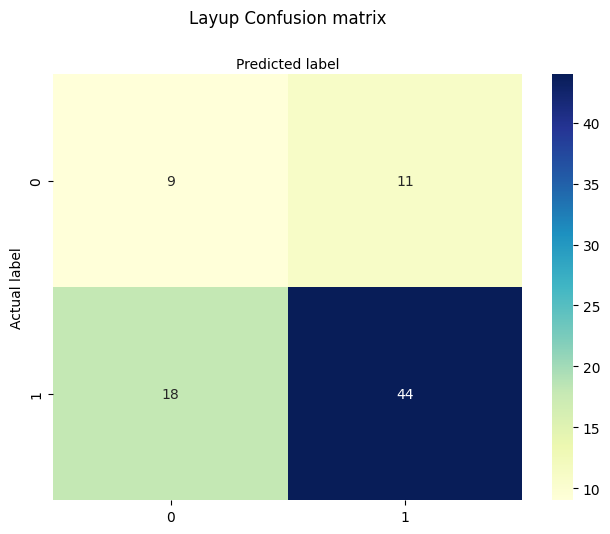

In [181]:
layup_cnf_matrix = metrics.confusion_matrix(layup_y_test, layup_y_pred)
print(f"Confusion matrix: {layup_cnf_matrix}")

class_names = layup_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(layup_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Layup Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

Confusion matrix: [[29  9]
 [23 16]]


Text(0.5, 427.9555555555555, 'Predicted label')

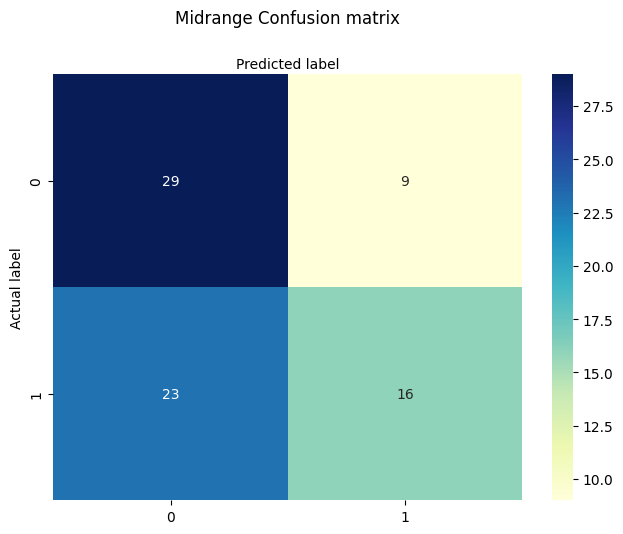

In [182]:
midrange_cnf_matrix = metrics.confusion_matrix(midrange_y_test, midrange_y_pred)
print(f"Confusion matrix: {midrange_cnf_matrix}")

class_names = midrange_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(midrange_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Midrange Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

Confusion matrix: [[84 36]
 [49 31]]


Text(0.5, 427.9555555555555, 'Predicted label')

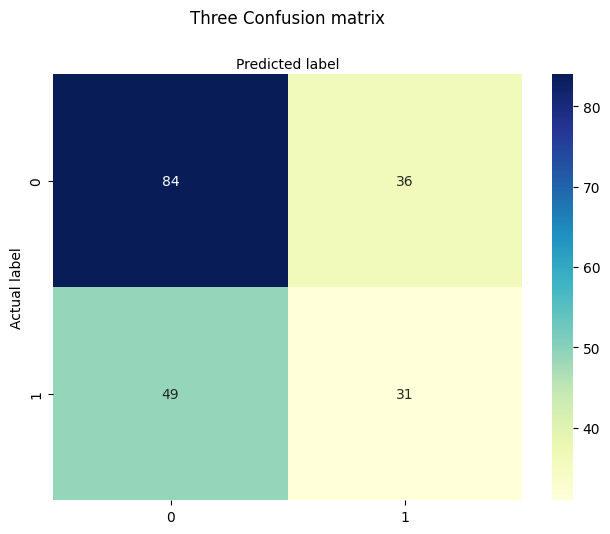

In [183]:
three_cnf_matrix = metrics.confusion_matrix(three_y_test, three_y_pred)
print(f"Confusion matrix: {three_cnf_matrix}")

class_names = three_y.unique()  # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(three_cnf_matrix), annot=True, cmap="YlGnBu", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Three Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [184]:
# Evaluate the model
print("Accuracy:", accuracy_score(layup_y_test, layup_y_pred))
print("\nClassification Report:\n", classification_report(layup_y_test, layup_y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(layup_y_test, layup_y_pred))

Accuracy: 0.6463414634146342

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.45      0.38        20
           1       0.80      0.71      0.75        62

    accuracy                           0.65        82
   macro avg       0.57      0.58      0.57        82
weighted avg       0.69      0.65      0.66        82


Confusion Matrix:
 [[ 9 11]
 [18 44]]


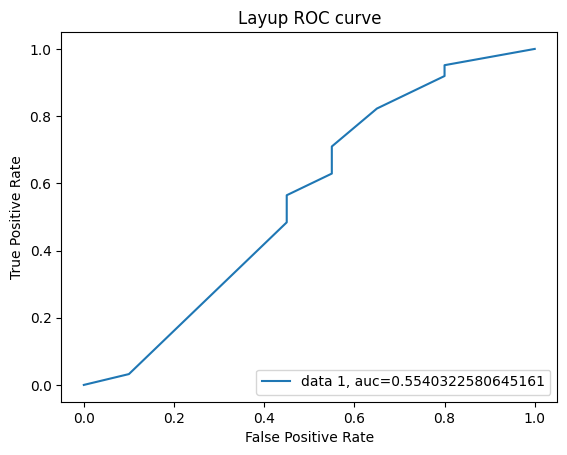

In [185]:
# ROC curve
layup_y_pred_proba = layup_clf.predict_proba(layup_X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(layup_y_test,  layup_y_pred_proba)
auc = metrics.roc_auc_score(layup_y_test, layup_y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Layup ROC curve")
plt.show()